In [2]:
pip install tensorflow

     |████████████████████████████████| 588.3 MB 6.0 kB/s eta 0:00:01   |▎                               | 5.6 MB 3.1 MB/s eta 0:03:08     |▋                               | 12.2 MB 288 kB/s eta 0:33:15     |████████▍                       | 153.7 MB 5.3 MB/s eta 0:01:23     |████████████████████            | 367.1 MB 3.9 MB/s eta 0:00:57     |██████████████████████▋         | 415.3 MB 4.4 MB/s eta 0:00:40     |████████████████████████        | 441.8 MB 2.7 MB/s eta 0:00:55     |█████████████████████████▍      | 467.0 MB 2.4 MB/s eta 0:00:51     |███████████████████████████▎    | 500.5 MB 2.9 MB/s eta 0:00:31     |██████████████████████████████▉ | 566.3 MB 1.8 MB/s eta 0:00:13
     |████████████████████████████████| 6.0 MB 183 kB/s eta 0:00:01     |██████▊                         | 1.3 MB 4.8 MB/s eta 0:00:01�████████████▋      | 4.8 MB 183 kB/s eta 0:00:07
     |████████████████████████████████| 1.1 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 212 kB/s eta 0:0

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
print(tf.__version__)

2.11.0


In [7]:
# Una red neuronal con un layer (una capa) y una neurona
# Creamos el modelo usando keras sequencial class. que nos permite crear una red neuronal como
# una secuencia de layers
# usamos Dense to build a simple network
model = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape = [1])
])

# when we COMPILE a network we need to specify to functions: a loss function and an optimizer
# it will repeat the guessing process until usando la funcion de perdida y tratando de 
# minimizar el error. eso se va a repetir en base a la cantidad de epochs  
# compiling the model:
### sgd: stochastic gradient descent
### loss: mean_squared_error
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

## Declare model inputs and outputs for training
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype= float)

## Training a model
model.fit(xs, ys, epochs=500)

## Make a prediction
print(model.predict([10.0]))



Epoch 1/500
1/1 [==============================] - 0s 450ms/step - loss: 25.6890
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 20.5044
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 16.4193
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 13.1995
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 10.6606
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 8.6573
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 7.0758
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 5.8260
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 4.8375
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 4.0545
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 3.4334
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 2.9397
Epoch 13/500
1/1 [==============================] - 0s

[fashion-nmist documentacion](https://github.com/zalandoresearch/fashion-mnist)

In [14]:
## Introduction to computer vision
# working with the dataset mnist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


fashion_mnist_data = fashion_mnist
print(type(fashion_mnist_data))
(train_images, train_labels),(test_images, test_labels)= fashion_mnist_data.load_data()


<class 'module'>


In [18]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
import numpy as np
print('Cantidad de clases en el dataset: {}'.format(np.unique(train_labels).shape[0]))

Cantidad de clases en el dataset: 10


Label: 9
Image Array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 

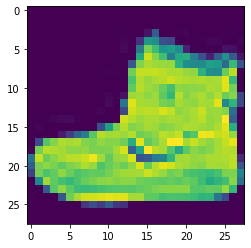

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Index of the images
index = 0

# Seteamos el número de caracteres por fila cuando lo printeamos
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'Label: {train_labels[index]}')
print(f'Image Array: {train_images[index]}')

## Visualize image
plt.imshow(train_images[index])

In [35]:
## Normalizamos los valores entre 0 y 1
train_images = train_images / np.max(train_images)
test_images = test_images /np.max(test_images)


In [37]:
## Build the classification model
model = keras.models.Sequential(
                    [
                        keras.layers.Flatten(),
                        keras.layers.Dense(128, activation = tf.nn.relu),
                        keras.layers.Dense(10, activation = tf.nn.softmax)
                    ]

)

In [46]:
## Sequential: That defines a sequence of layers in the neural network
## Flatten: Toma las imagenes que estan en matrices de 28*28 y lo transforma en 1-dimensinal array
## Dense: Add a layer network
## Relu: Pasa solo valores de 0 o mayores a 0 a la siguiente capa
##if x > 0: 
##  return x
##else: 
##  return 0
## Softmax: Softmax takes a list of values and scales these so the sum of all elements 
# will be equal to 1. When applied to model outputs, you can think of the scaled values as 
# the probability for that class. Examples:

# Declaramos algunos inputs de ejemplo y los transformamos a tensores
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the input to softmax activation function
outputs = keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs {sum}')

# Get the index of the highest value
prediction = np.argmax(outputs)
print(f'class with the highest probability: {prediction}')


input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs 1.0
class with the highest probability: 2


In [47]:
from tensorflow import keras
# Creamos una red.
# Primero tenemos la capa inicial: input_data
# Luego tenemos la capa oculta
# Luego tenemos la capa final (tiene una neurona por cada clase)

In [30]:
print(tf.__version__)

2.11.0


In [48]:
# Construimos el modelo
# primero lo compilamos:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
# hacemos el fit del modelo
model.fit(train_images, train_labels, epochs=5)

2022-12-15 16:18:06.381647: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5006 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3115 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8922


In [50]:
## Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8731


[0.34460148215293884, 0.8730999827384949]

In [56]:
# Using callbacks to control training
### tf.keras.callbacks.Callback base class.
###You can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class. 
# From there, you can define available methods to set where the callback will be executed. For instance below, 
# you will use the on_epoch_end() method to check the loss at each training epoch.

class myCallback(keras.callbacks.Callback): # Clase que hereda de tf.keras.callbacks.Callback 
    def on_epoch_end(self, epoch, logs={}):
        """
        Halts the training after reach 60 percent accuracy

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from training epochs
        """

        # Check accuracy
        if(logs.get('loss')<0.4):

            # Stop if threshold is met
            print('\n Loss is lower than 0.4 so cancelling training!')
            self.model.stop_training = True

# Instantiate Class
callbacks = myCallback()

In [59]:
# Defino nuevamente el modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Compilamos el modelo
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [60]:
# Train the model with a call back
model.fit(train_images, train_labels, epochs=10, callbacks = [callbacks])

Epoch 1/10


2022-12-15 16:48:06.501873: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4755 - accuracy: 0.8309
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8685
 Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3600 - accuracy: 0.8685


In [ ]:
## Convolutional Neural Networks